Импортирование библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Подключение датасета и вывод общей информации

In [ ]:
!gdown 1Y_LmSFF-v0WmF5HJknoo1_2UjrJuzbZV # временная ошибка

Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head(10)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation
5,7150000.0,Secondary,Опалиха,6.0,Moscow region,1.0,38.4,18.0,8.0,8.0,18,European-style renovation
6,7400000.0,Secondary,Нахабино,11.0,Moscow region,1.0,33.0,16.0,8.0,7.0,7,European-style renovation
7,7500000.0,Secondary,Строгино,27.0,Moscow region,1.0,25.0,14.8,8.7,16.0,34,European-style renovation
8,7800000.0,Secondary,Красногорская,6.0,Moscow region,1.0,41.8,18.0,10.0,6.0,17,Cosmetic
9,7999999.0,Secondary,Тушинская,35.0,Moscow region,1.0,44.0,19.0,11.0,11.0,24,Designer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Minutes to metro'}>,
        <Axes: title={'center': 'Number of rooms'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Living area'}>,
        <Axes: title={'center': 'Kitchen area'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'Number of floors'}>, <Axes: >]],
      dtype=object)

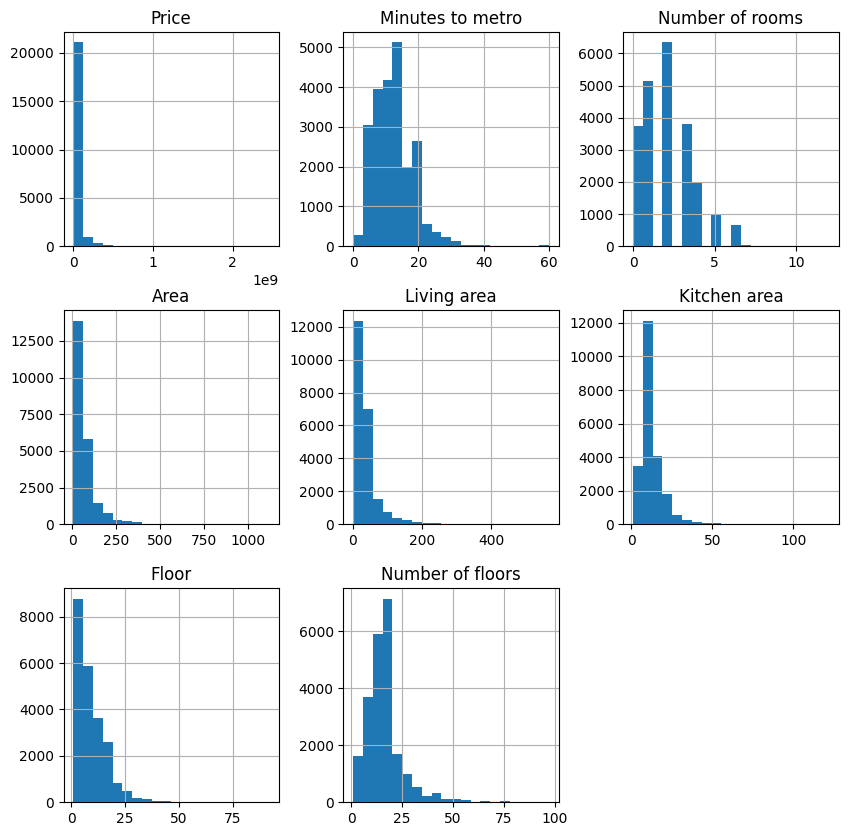

In [ ]:
df.hist(figsize=(10,10), bins=20)

Исправление ошибки с количеством станций метро

In [ ]:
df['Metro station'].nunique() # станций метро в Москве точно меньше

547

In [ ]:
len(set(map(lambda x: x.strip().lower(), df['Metro station'])))

310

In [ ]:
df['Metro station'] = list(map(lambda x: x.strip().lower(), df['Metro station']))

In [ ]:
df['Metro station'].nunique()

310

Анализ значений

<ipython-input-5-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

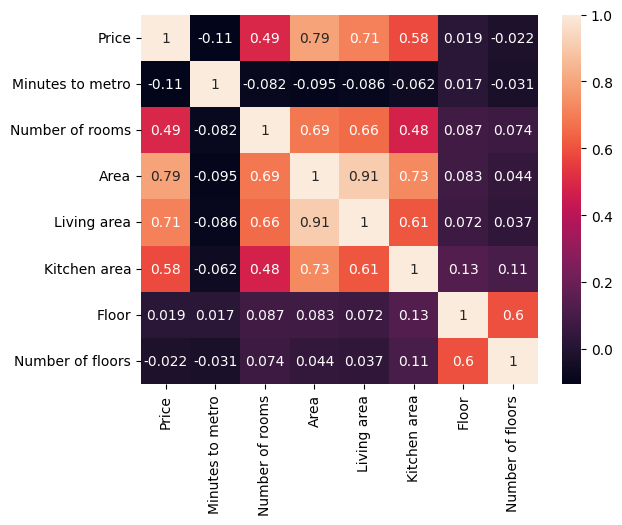

In [ ]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Зависимость цены от площади = 0.79')

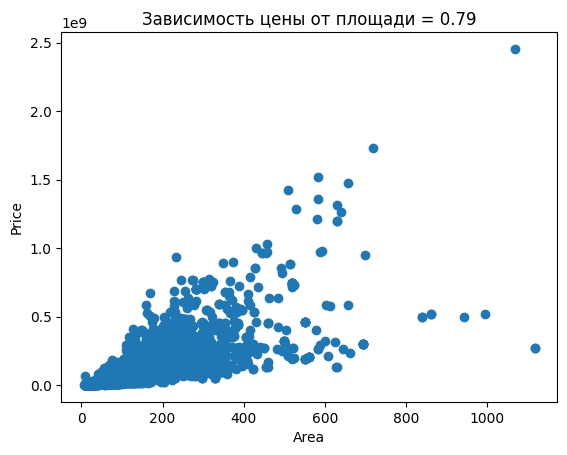

In [ ]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Зависимость цены от площади = {x}'.format(x=round(df['Price'].corr(df['Area']), 2)))

<Axes: xlabel='Number of rooms', ylabel='Price'>

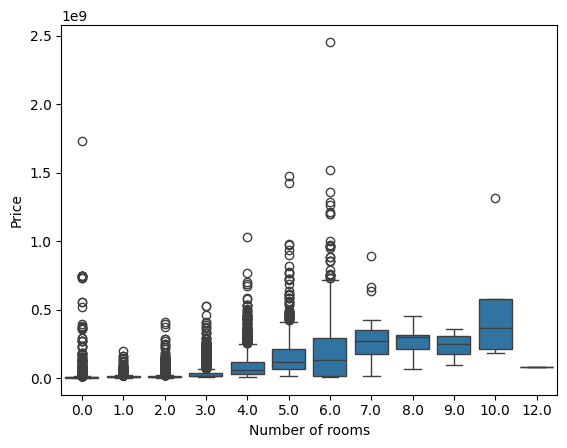

In [ ]:
sns.boxplot(df, x='Number of rooms', y='Price')

Выделение категориальных признаков

In [ ]:
df['Metro station'].value_counts()

красногвардейская           2698
депо                        1647
братиславская               1161
котельники                   981
жулебино                     731
                            ... 
санино                         1
терехово (мнёвники)            1
сколково                       1
улица академика королёва       1
вешняки                        1
Name: Metro station, Length: 310, dtype: int64

In [ ]:
df['Apartment type'].value_counts()

Secondary       13152
New building     9524
Name: Apartment type, dtype: int64

In [ ]:
df['Region'].value_counts()

Moscow           16113
Moscow region     6563
Name: Region, dtype: int64

In [ ]:
df['Renovation'].value_counts()

Cosmetic                     12788
European-style renovation     3666
Without renovation            3198
Designer                      3024
Name: Renovation, dtype: int64

In [ ]:
cat_columns = ['Apartment type', 'Region', 'Renovation']
cat_data = df[cat_columns]

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
one_hot_data = ohe.fit_transform(cat_data)
one_hot_data = pd.DataFrame(one_hot_data, columns=ohe.get_feature_names_out())
one_hot_data

,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
22671,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22672,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22673,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22674,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df = df.drop(cat_columns, axis=1)

In [ ]:
df = pd.concat([df, one_hot_data], axis = 1)
df

,Price,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,Опалиха,6.0,1.0,30.60,11.1,8.5,25.0,25,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,9000000.0,Павшино,2.0,1.0,49.20,20.0,10.0,6.0,15,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,11090000.0,Мякинино,14.0,1.0,44.70,16.2,13.1,10.0,25,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,8300000.0,Строгино,8.0,1.0,35.10,16.0,11.0,12.0,33,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,6450000.0,Опалиха,6.0,1.0,37.70,15.2,4.0,5.0,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,Котельники,8.0,0.0,31.75,13.0,5.0,4.0,17,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22672,5900000.0,Домодедовская,25.0,1.0,31.60,10.1,12.2,11.0,15,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22673,3700000.0,Котельники,30.0,0.0,18.00,15.0,8.1,17.0,17,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22674,5768869.0,Жулебино,14.0,2.0,36.39,22.0,6.6,12.0,14,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Price                                 22676 non-null  float64
 1   Metro station                         22676 non-null  object 
 2   Minutes to metro                      22676 non-null  float64
 3   Number of rooms                       22676 non-null  float64
 4   Area                                  22676 non-null  float64
 5   Living area                           22676 non-null  float64
 6   Kitchen area                          22676 non-null  float64
 7   Floor                                 22676 non-null  float64
 8   Number of floors                      22676 non-null  int64  
 9   Apartment type_New building           22676 non-null  float64
 10  Apartment type_Secondary              22676 non-null  float64
 11  Region_Moscow  